<a href="https://colab.research.google.com/github/Sami-03/tdlog/blob/main/notebooks/code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Pour charger un fichier Excel (.xlsx)
data = pd.read_excel("dataset_02052023.xlsx")
#Taille des données
data.shape

(7409, 24)

In [ ]:
data.head()

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26T08:17:22.852Z,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26T08:17:24.863Z,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26T08:17:25.877Z,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num                   7409 non-null   int64  
 1   Timestamp             7409 non-null   object 
 2   Current_J0            7363 non-null   float64
 3   Temperature_T0        7355 non-null   float64
 4   Current_J1            7355 non-null   float64
 5   Temperature_J1        7355 non-null   float64
 6   Current_J2            7355 non-null   float64
 7   Temperature_J2        7355 non-null   float64
 8   Current_J3            7355 non-null   float64
 9   Temperature_J3        7355 non-null   float64
 10  Current_J4            7355 non-null   float64
 11  Temperature_J4        7355 non-null   float64
 12  Current_J5            7355 non-null   float64
 13  Temperature_J5        7355 non-null   float64
 14  Speed_J0              7355 non-null   float64
 15  Speed_J1             

In [ ]:
data.describe()

,Num,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,...,Temperature_J5,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop
count,7409.000000,7363.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,...,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7409.000000,7355.000000
mean,3705.000000,-0.048934,34.906781,-2.297936,37.659636,-1.199381,38.064064,-0.605312,40.936999,-0.022968,...,41.891094,0.001671,0.000061,0.003791,-0.004610,-0.000810,0.002880,0.109527,141.113241,0.037797
std,2138.938405,0.829395,2.762057,0.800450,3.247315,0.609984,3.311948,0.514937,3.182399,0.630789,...,3.680003,0.148826,0.049370,0.729422,0.359999,0.038436,0.313953,0.078832,80.542340,0.190719
min,1.000000,-6.247756,27.812500,-5.808734,29.312500,-4.171966,29.375000,-3.333102,32.125000,-4.738406,...,32.000000,-0.656331,-0.330833,-2.733091,-1.271460,-0.226233,-1.629721,0.020180,1.000000,0.000000
25%,1853.000000,-0.195026,33.000000,-2.664919,35.375000,-1.552803,35.750000,-0.830933,38.937500,-0.125809,...,39.500000,-0.000483,-0.000659,-0.004100,-0.005365,-0.000120,-0.000803,0.082387,68.000000,0.000000
50%,3705.000000,-0.080830,36.500000,-2.236342,39.687500,-1.077137,40.187500,-0.571190,43.062500,-0.012325,...,44.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085192,154.000000,0.000000
75%,5557.000000,0.095959,37.062500,-1.778334,40.125000,-0.838721,40.437500,-0.388398,43.125000,0.086098,...,44.500000,0.002115,0.000540,0.000205,0.009912,0.000066,0.012924,0.089518,218.000000,0.000000
max,7409.000000,6.806938,37.250000,1.083596,40.500000,2.464940,40.937500,2.270268,43.437500,4.089389,...,44.937500,0.791929,0.615526,2.679848,1.363093,0.193914,1.378015,0.602054,264.000000,1.000000


In [ ]:
data.dtypes

,0
Num,int64
Timestamp,object
Current_J0,float64
Temperature_T0,float64
Current_J1,float64
Temperature_J1,float64
Current_J2,float64
Temperature_J2,float64
Current_J3,float64
Temperature_J3,float64


In [ ]:
 data.isnull().sum()

,0
Num,0
Timestamp,0
Current_J0,46
Temperature_T0,54
Current_J1,54
Temperature_J1,54
Current_J2,54
Temperature_J2,54
Current_J3,54
Temperature_J3,54


In [ ]:
# Encoder True=1, False=0
data['grip_lost'] = data['grip_lost'].astype(int)

# Vérification
print(data['grip_lost'].value_counts())
print(data['Robot_ProtectiveStop'].value_counts())

grip_lost
0    7166
1     243
Name: count, dtype: int64
Robot_ProtectiveStop
0.0    7077
1.0     278
Name: count, dtype: int64


In [ ]:
pd.set_option('display.max_columns', None)  # Pour voir toutes les colonnes
print("=== ÉCHANTILLON DU DATASET APRÈS PRÉTRAITEMENT ===")
display(data.head())

=== ÉCHANTILLON DU DATASET APRÈS PRÉTRAITEMENT ===


,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,Current_J5,Temperature_J5,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,-0.062540,32.2500,-0.152622,32.0000,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,0
1,2,2022-10-26T08:17:22.852Z,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,-1.062762,32.2500,-0.260764,32.0000,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,0
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,-0.668869,32.3125,0.039071,32.0625,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,0
3,4,2022-10-26T08:17:24.863Z,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,-0.819755,32.2500,0.153903,32.0000,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,0
4,5,2022-10-26T08:17:25.877Z,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,-0.966427,32.3125,0.178998,32.0000,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,0


In [ ]:
# 1. Traitement des features numériques
# Remplissage par la moyenne pour TOUTES les colonnes numériques
num_cols = data.select_dtypes(include=['number']).columns.drop('Robot_ProtectiveStop', errors='ignore')
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# 2. Nettoyage strict de la target
def clean_target(x):
    # Conversion robuste en 0/1
    if pd.isna(x) or str(x).strip() in ['', 'nan', 'NaN', 'None']:
        return 0  # Option: Modifier selon votre logique métier

    try:
        x_clean = float(x)
        return 1 if x_clean >= 0.5 else 0
    except:
        return 1 if str(x).strip().lower() in ['1', 'true', 'vrai', 'oui', 'y', 'yes'] else 0

# Application et vérification
data['Robot_ProtectiveStop'] = data['Robot_ProtectiveStop'].apply(clean_target).astype(int)


In [ ]:
# 3. Vérification finale
print("Valeurs manquantes restantes:\n", data.isna().sum())
print("\nDistribution de la target:\n", data['Robot_ProtectiveStop'].value_counts())

# 4. Option: Suppression des lignes problématiques si nécessaire
if data['Robot_ProtectiveStop'].isna().any():
    print("\nAttention: NaN résiduels dans la target, suppression des lignes")
    data = data.dropna(subset=['Robot_ProtectiveStop'])

Valeurs manquantes restantes:
 Num                     0
Timestamp               0
Current_J0              0
Temperature_T0          0
Current_J1              0
Temperature_J1          0
Current_J2              0
Temperature_J2          0
Current_J3              0
Temperature_J3          0
Current_J4              0
Temperature_J4          0
Current_J5              0
Temperature_J5          0
Speed_J0                0
Speed_J1                0
Speed_J2                0
Speed_J3                0
Speed_J4                0
Speed_J5                0
Tool_current            0
cycle                   0
Robot_ProtectiveStop    0
grip_lost               0
dtype: int64

Distribution de la target:
 Robot_ProtectiveStop
0    7131
1     278
Name: count, dtype: int64


In [ ]:
# 1. Vérification et encodage de 'grip_lost' si nécessaire
if 'grip_lost' in data.columns:
    if data['grip_lost'].dtype == bool:
        data['grip_lost'] = data['grip_lost'].astype(int)
        print("Colonne 'grip_lost' encodée en 0/1")
    elif set(data['grip_lost'].unique()) == {0, 1}:
        print("Colonne 'grip_lost' déjà encodée")
    else:
        print("Attention: 'grip_lost' a des valeurs inattendues:", data['grip_lost'].unique())


Colonne 'grip_lost' déjà encodée


In [ ]:
# 2. Définition des colonnes avec vérification d'existence
def get_valid_columns(columns, df):
    return [col for col in columns if col in df.columns]

current_cols = get_valid_columns([
    'Current_J0', 'Current_J1', 'Current_J2',
    'Current_J3', 'Current_J4', 'Current_J5', 'Tool_current'
], data)

temp_cols = get_valid_columns([
    'Temperature_J0', 'Temperature_J1', 'Temperature_J2',
    'Temperature_J3', 'Temperature_J4', 'Temperature_J5'
], data)

speed_cols = get_valid_columns([
    'Speed_J0', 'Speed_J1', 'Speed_J2',
    'Speed_J3', 'Speed_J4', 'Speed_J5'
], data)

In [ ]:
# 3. Standardisation des courants
if current_cols:
    std_scaler = StandardScaler()
    data[current_cols] = std_scaler.fit_transform(data[current_cols])

    print("\n=== Vérification Standardisation ===")
    print(pd.DataFrame({
        'Moyenne (devrait être ~0)': data[current_cols].mean().round(2),
        'Écart-type (devrait être ~1)': data[current_cols].std().round(2)
    }))
else:
    print("Aucune colonne de courant valide trouvée")


=== Vérification Standardisation ===
              Moyenne (devrait être ~0)  Écart-type (devrait être ~1)
Current_J0                          0.0                           1.0
Current_J1                         -0.0                           1.0
Current_J2                         -0.0                           1.0
Current_J3                          0.0                           1.0
Current_J4                          0.0                           1.0
Current_J5                         -0.0                           1.0
Tool_current                       -0.0                           1.0


In [ ]:
# 4. Normalisation des températures et vitesses
if temp_cols + speed_cols:
    minmax_scaler = MinMaxScaler(feature_range=(0, 1))
    data[temp_cols + speed_cols] = minmax_scaler.fit_transform(data[temp_cols + speed_cols])

    print("\n=== Vérification Normalisation ===")
    if temp_cols:
        print("Températures:")
        print(pd.DataFrame({
            'Min (devrait être 0)': data[temp_cols].min().round(2),
            'Max (devrait être 1)': data[temp_cols].max().round(2)
        }))

    if speed_cols:
        print("\nVitesses:")
        print(pd.DataFrame({
            'Min (devrait être 0)': data[speed_cols].min().round(2),
            'Max (devrait être 1)': data[speed_cols].max().round(2)
        }))
else:
    print("Aucune colonne de température ou vitesse valide trouvée")


=== Vérification Normalisation ===
Températures:
                Min (devrait être 0)  Max (devrait être 1)
Temperature_J1                   0.0                   1.0
Temperature_J2                   0.0                   1.0
Temperature_J3                   0.0                   1.0
Temperature_J4                   0.0                   1.0
Temperature_J5                   0.0                   1.0

Vitesses:
          Min (devrait être 0)  Max (devrait être 1)
Speed_J0                   0.0                   1.0
Speed_J1                   0.0                   1.0
Speed_J2                   0.0                   1.0
Speed_J3                   0.0                   1.0
Speed_J4                   0.0                   1.0
Speed_J5                   0.0                   1.0


In [ ]:
# 5. Vérification de la variable cible
if 'Robot_ProtectiveStop' in data.columns:
    print("\n=== Variable Cible ===")
    print("Valeurs uniques:", data['Robot_ProtectiveStop'].unique())
    print("Distribution:\n", data['Robot_ProtectiveStop'].value_counts())
else:
    print("\nAttention: Colonne 'Robot_ProtectiveStop' manquante")


=== Variable Cible ===
Valeurs uniques: [0 1]
Distribution:
 Robot_ProtectiveStop
0    7131
1     278
Name: count, dtype: int64


In [ ]:
# 6. Sauvegarde des résultats
output_path = "new-dataset.csv"
data.to_csv(output_path, index=False)
print(f"\nDonnées sauvegardées dans {output_path}")


Données sauvegardées dans new-dataset.csv


In [ ]:
pd.set_option('display.max_columns', None)  # Pour voir toutes les colonnes
print("=== ÉCHANTILLON DU DATASET APRÈS PRÉTRAITEMENT ===")
display(data.head())

=== ÉCHANTILLON DU DATASET APRÈS PRÉTRAITEMENT ===


,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,Current_J5,Temperature_J5,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.191787,27.875,0.342666,0.005587,-0.546407,0.000000,-0.766551,0.000000,-0.062968,0.000000,-1.193261,0.000000,0.657269,0.349068,0.505160,0.432189,0.520663,0.490987,-0.341178,1,0,0
1,2,2022-10-26T08:17:22.852Z,0.779597,27.875,0.024426,0.000000,0.547665,0.005405,0.778164,0.005525,-1.654555,0.000000,-2.033778,0.000000,0.453186,0.349264,0.505322,0.483243,0.536637,0.541982,5.046802,1,0,0
2,3,2022-10-26T08:17:23.857Z,-0.218370,27.875,-0.630081,0.000000,-1.818209,0.005405,0.494741,0.000000,-1.027779,0.004762,0.296650,0.004831,0.547740,0.357822,0.036434,0.626796,0.539544,0.376650,-0.383346,1,0,0
3,4,2022-10-26T08:17:24.863Z,0.137873,27.875,-1.742795,0.000000,-0.030065,0.005405,-1.176952,0.000000,-1.267874,0.000000,1.189164,0.000000,0.390835,0.344396,0.503238,0.336780,0.582282,0.683331,-0.333620,1,0,0
4,5,2022-10-26T08:17:25.877Z,1.128592,27.875,-0.803657,0.005587,-0.978574,0.005405,-3.413417,0.005525,-1.501263,0.004762,1.384209,0.000000,0.540745,0.355468,0.505128,0.348513,0.574149,0.602017,-0.294743,1,0,0


In [ ]:
# Distribution de la variable cible
target_dist = data['Robot_ProtectiveStop'].value_counts()

print("=== DISTRIBUTION DES CLASSES ===")
print(target_dist)

# Calcul du ratio
ratio = target_dist[0] / target_dist[1]
print(f"\nRatio majoritaire/minoritaire: {ratio:.1f}:1")

=== DISTRIBUTION DES CLASSES ===
Robot_ProtectiveStop
0    7131
1     278
Name: count, dtype: int64

Ratio majoritaire/minoritaire: 25.7:1


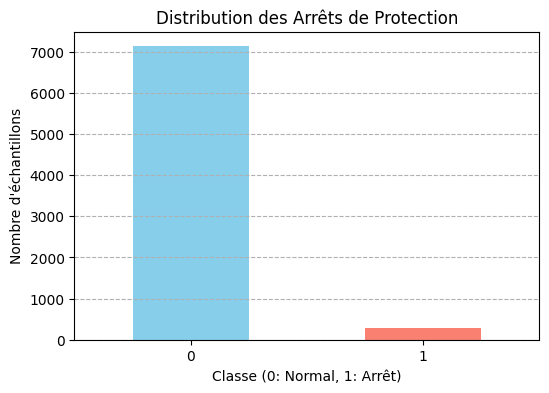

In [ ]:
# Diagramme en barres
plt.figure(figsize=(6, 4))
target_dist.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution des Arrêts de Protection')
plt.xlabel('Classe (0: Normal, 1: Arrêt)')
plt.ylabel('Nombre d\'échantillons')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
# 1. Sauvegarde des timestamps originaux AVANT SMOTE
timestamps = data['Timestamp'].copy()  # Adapter au nom exact de votre colonne

# 2. SMOTE (en excluant explicitement les colonnes non-numériques)
X = data.drop(["Robot_ProtectiveStop", "Timestamp"], axis=1).select_dtypes(include=['number'])
y = data["Robot_ProtectiveStop"]

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 3. Réintégration des timestamps avec préservation de l'ordre temporel
# Création d'un DataFrame temporaire pour le réassemblage
resampled_data = pd.DataFrame(X_res, columns=X.columns)

# Ajout de la target rééquilibrée
resampled_data['Robot_ProtectiveStop'] = y_res.values

# Gestion intelligente des timestamps :
if len(timestamps) > 0:
    # Duplication proportionnelle des timestamps existants
    n_new_samples = len(y_res) - len(timestamps)
    replicated_timestamps = pd.Series(
        np.random.choice(timestamps, size=n_new_samples),  # Duplication aléatoire
        index=range(len(timestamps), len(y_res))
    )
    resampled_data['Timestamp'] = pd.concat([timestamps, replicated_timestamps]).values
else:
    resampled_data['Timestamp'] = pd.NaT  # Cas par défaut si pas de timestamps

# 4. Vérification finale
print("\nVérification des timestamps :")
print(f"- Origine : {timestamps.dtype} | Rééchantillonnage : {resampled_data['Timestamp'].dtype}")
print(f"- Valeurs manquantes : {resampled_data['Timestamp'].isna().sum()}")

# 5. Sauvegarde avec vérification des types
resampled_data.to_csv('new-dataset.csv',
                     index=False,
                     date_format='%Y-%m-%d %H:%M:%S.%f')  # Format standard pour datetime


Vérification des timestamps :
- Origine : object | Rééchantillonnage : object
- Valeurs manquantes : 0


In [ ]:
print("\nDataset final:")
print(resampled_data[['Timestamp', 'Robot_ProtectiveStop']].head())
print(f"\nNombre de nouvelles lignes synthétiques: {len(y_res) - len(timestamps)}")


Dataset final:
                  Timestamp  Robot_ProtectiveStop
0  2022-10-26T08:17:21.847Z                     0
1  2022-10-26T08:17:22.852Z                     0
2  2022-10-26T08:17:23.857Z                     0
3  2022-10-26T08:17:24.863Z                     0
4  2022-10-26T08:17:25.877Z                     0

Nombre de nouvelles lignes synthétiques: 6853


In [ ]:
print(y_res.value_counts())


Robot_ProtectiveStop
0    7131
1    7131
Name: count, dtype: int64


In [ ]:
pd.set_option('display.max_columns', None)  # Pour voir toutes les colonnes
print("=== ÉCHANTILLON DU DATASET APRÈS PRÉTRAITEMENT ===")
display(data.head())

=== ÉCHANTILLON DU DATASET APRÈS PRÉTRAITEMENT ===


,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,Current_J5,Temperature_J5,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.191787,27.875,0.342666,0.005587,-0.546407,0.000000,-0.766551,0.000000,-0.062968,0.000000,-1.193261,0.000000,0.657269,0.349068,0.505160,0.432189,0.520663,0.490987,-0.341178,1,0,0
1,2,2022-10-26T08:17:22.852Z,0.779597,27.875,0.024426,0.000000,0.547665,0.005405,0.778164,0.005525,-1.654555,0.000000,-2.033778,0.000000,0.453186,0.349264,0.505322,0.483243,0.536637,0.541982,5.046802,1,0,0
2,3,2022-10-26T08:17:23.857Z,-0.218370,27.875,-0.630081,0.000000,-1.818209,0.005405,0.494741,0.000000,-1.027779,0.004762,0.296650,0.004831,0.547740,0.357822,0.036434,0.626796,0.539544,0.376650,-0.383346,1,0,0
3,4,2022-10-26T08:17:24.863Z,0.137873,27.875,-1.742795,0.000000,-0.030065,0.005405,-1.176952,0.000000,-1.267874,0.000000,1.189164,0.000000,0.390835,0.344396,0.503238,0.336780,0.582282,0.683331,-0.333620,1,0,0
4,5,2022-10-26T08:17:25.877Z,1.128592,27.875,-0.803657,0.005587,-0.978574,0.005405,-3.413417,0.005525,-1.501263,0.004762,1.384209,0.000000,0.540745,0.355468,0.505128,0.348513,0.574149,0.602017,-0.294743,1,0,0


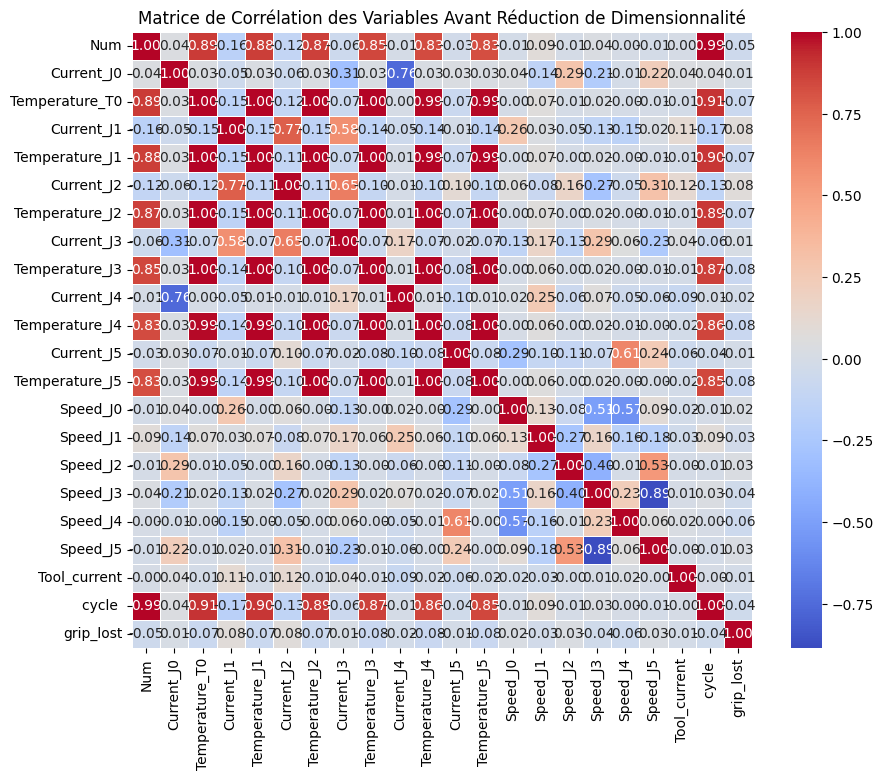

In [ ]:



# 1. Séparation des features (X) et de la cible (y)
X = resampled_data.drop(["Robot_ProtectiveStop", "Timestamp"], axis=1)  # Exclure la cible et les timestamps

# 2. Calcul de la matrice de corrélation
corr_matrix = X.corr()

# 3. Tracer la heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation des Variables Avant Réduction de Dimensionnalité")
plt.show()


In [ ]:
# Sélectionner uniquement les colonnes numériques
features_for_pca = data.select_dtypes(exclude=['object', 'datetime']).columns.difference([
    'Robot_ProtectiveStop',
    'grip_lost',
    'Tool_current'
])

# Afficher les colonnes sélectionnées pour PCA
print("Colonnes utilisées pour PCA:", features_for_pca.tolist())

Colonnes utilisées pour PCA: ['Current_J0', 'Current_J1', 'Current_J2', 'Current_J3', 'Current_J4', 'Current_J5', 'Num', 'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5', 'Temperature_J1', 'Temperature_J2', 'Temperature_J3', 'Temperature_J4', 'Temperature_J5', 'Temperature_T0', 'cycle ']


In [ ]:
# Sélectionner uniquement les colonnes numériques
features_for_pca = data.select_dtypes(exclude=['object', 'datetime']).columns.difference([
    'Robot_ProtectiveStop',
    'grip_lost',
    'Tool_current'
])

# Afficher les colonnes sélectionnées pour PCA
print("Colonnes utilisées pour PCA:", features_for_pca.tolist())

Colonnes utilisées pour PCA: ['Current_J0', 'Current_J1', 'Current_J2', 'Current_J3', 'Current_J4', 'Current_J5', 'Num', 'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5', 'Temperature_J1', 'Temperature_J2', 'Temperature_J3', 'Temperature_J4', 'Temperature_J5', 'Temperature_T0', 'cycle ']


In [ ]:
# Exclure la colonne de timestamp
features_for_pca = features_for_pca.difference(['Timestamp'])

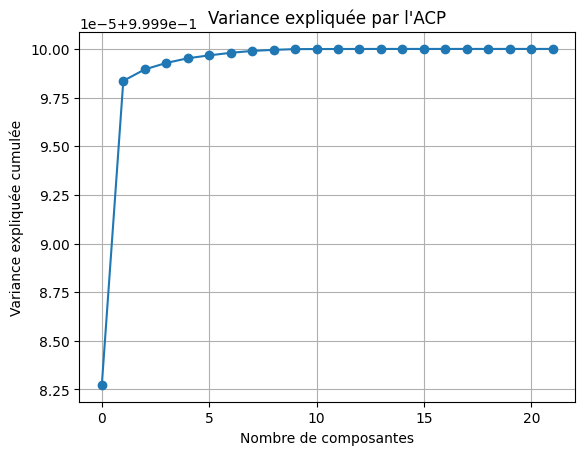

In [ ]:
pca = PCA().fit(X)  # Sans limite de composantes
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée par l\'ACP')
plt.grid()
plt.show()

🔍 Colonnes utilisées pour PCA : ['Current_J0', 'Current_J1', 'Current_J2', 'Current_J3', 'Current_J4', 'Current_J5', 'Num', 'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5', 'Temperature_J1', 'Temperature_J2', 'Temperature_J3', 'Temperature_J4', 'Temperature_J5', 'Temperature_T0', 'cycle ']


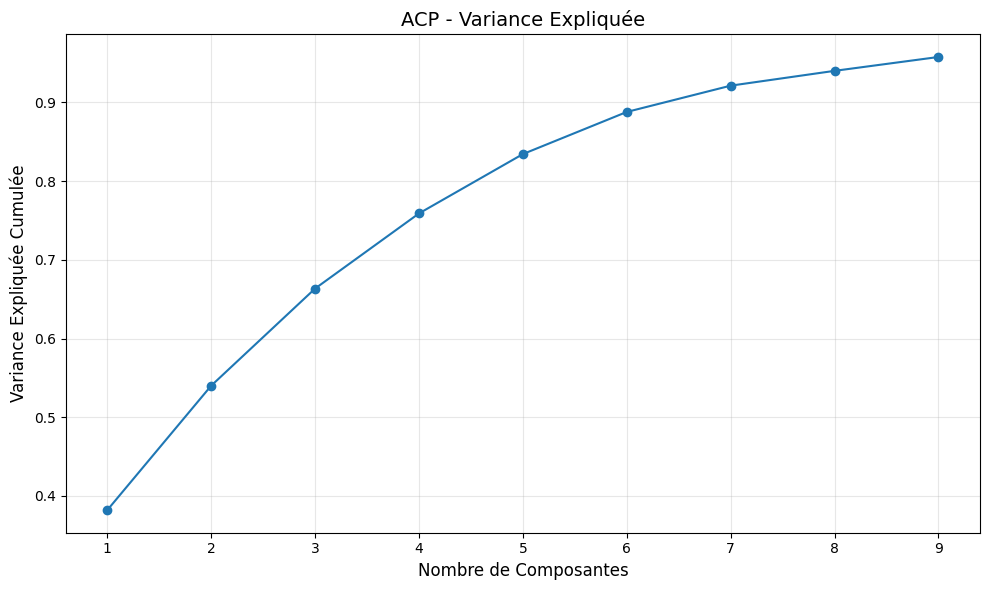

✅ Réduction de 20 à 9 composantes principales
💾 Résultats sauvegardés dans : new-dataset.csv
📦 Colonnes finales : ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'Robot_ProtectiveStop', 'grip_lost', 'Tool_current']


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Sélection des colonnes pour la PCA (déjà fait)
features_for_pca = data.select_dtypes(exclude=['object', 'datetime']).columns.difference([
    'Robot_ProtectiveStop', 'grip_lost', 'Tool_current', 'Timestamp'
])

print("🔍 Colonnes utilisées pour PCA :", features_for_pca.tolist())

# 2. Extraction des features
X = data[features_for_pca]

# 3. Standardisation globale avant PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA : réduction à 95% de variance expliquée
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# 5. Visualisation de la variance expliquée cumulée
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1),
         np.cumsum(pca.explained_variance_ratio_),
         'o-', color='#1f77b4')
plt.xlabel('Nombre de Composantes', fontsize=12)
plt.ylabel('Variance Expliquée Cumulée', fontsize=12)
plt.title('ACP - Variance Expliquée', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Info réduction
print(f"✅ Réduction de {X.shape[1]} à {pca.n_components_} composantes principales")

# 7. Création du DataFrame PCA
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# 8. Fusion avec les autres colonnes utiles
final_data = pd.concat([
    pca_df,
    data[['Robot_ProtectiveStop', 'grip_lost', 'Tool_current']].reset_index(drop=True)
], axis=1)

# 9. Sauvegarde
output_path = "new-dataset.csv"
final_data.to_csv(output_path, index=False)
print(f"💾 Résultats sauvegardés dans : {output_path}")
print("📦 Colonnes finales :", final_data.columns.tolist())

In [ ]:
# Créer un DataFrame avec les composantes principales
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)
# Fusionner les résultats PCA avec les autres colonnes
final_data = pd.concat([
    pca_df,
    data[['Robot_ProtectiveStop', 'grip_lost', 'Tool_current']].reset_index(drop=True)
], axis=1)
# Sauvegarder le DataFrame final avec les résultats PCA
output_path = "new-dataset.csv"
final_data.to_csv(output_path, index=False)

# Afficher le chemin du fichier sauvegardé
print(f"\nRésultats sauvegardés dans {output_path}")
print("Colonnes finales:", final_data.columns.tolist())


Résultats sauvegardés dans new-dataset.csv
Colonnes finales: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'Robot_ProtectiveStop', 'grip_lost', 'Tool_current']


In [ ]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 124.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0

In [ ]:
import pandas as pd
import numpy as np

# Exemple de données brutes
data = pd.DataFrame({
    'Timestamp': ['2022-10-26T08:17:21.847Z', '2022-10-26T08:17:22.847Z',
                  '2022-10-26T08:17:23.847Z', '2022-10-26T08:17:24.847Z',
                  # ... imagine 1482 lignes
                 ],
    'Value': [10, 20, 30, 40]  # Une colonne numérique à prédire ou utiliser
})

# Convertir la colonne Timestamp en datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Option 1 : Extraire des caractéristiques numériques
data['Hour'] = data['Timestamp'].dt.hour
data['Minute'] = data['Timestamp'].dt.minute
data['Second'] = data['Timestamp'].dt.second

# Option 2 : Calculer la différence de temps en secondes depuis le premier timestamp
data['Time_Diff'] = (data['Timestamp'] - data['Timestamp'].iloc[0]).dt.total_seconds()

# Supprimer la colonne Timestamp originale
data = data.drop(columns=['Timestamp'])

# Convertir en NumPy array
data_array = data.to_numpy(dtype='float32')

# Créer des séquences de 10 pas de temps
def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        X.append(seq)
    return np.array(X)

seq_length = 10
X = create_sequences(data_array, seq_length)

# Vérification
print("Shape de X :", X.shape)  # Par exemple (1473, 10, n_features) si 1482 lignes initiales
print("Dtype de X :", X.dtype)

Shape de X : (0,)
Dtype de X : float64


In [ ]:
import numpy as np

# 1. Créez votre vecteur y avec le bon nombre d'éléments (1473 dans votre cas)
# Exemple 1: Si vous avez des étiquettes binaires
y = np.random.randint(0, 2, size=1473).astype('float32')  # Aléatoire 0 ou 1

# Exemple 2: Si vous avez une séquence spécifique
# y = np.array([votre_séquence_réelle], dtype='float32')

# 2. Alignez avec X comme dans votre code original
y = y[seq_length - 1:]  # Ajustez selon votre seq_length

# 3. Vérification
print("Shape de y :", y.shape)  # Devrait correspondre à X.shape[0]
print("Dtype de y :", y.dtype)  # Devrait être float32
print("5 premières valeurs :", y[:5])

Shape de y : (1464,)
Dtype de y : float32
5 premières valeurs : [1. 0. 0. 1. 0.]


In [ ]:
!pip install -q wandb


In [ ]:
pip install wandb==0.13.9  # Known stable version

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.1 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8792 sha256=30607b0c437869a5fe2c996eeb11a569e17ac2e07671666987f86e1251cf9759
  Stored in directory: /root/.cache/pip/wheels/ea/b7/8b/84e94095ea418b9442f5abeba4ca7b0ad52d3fe7b69d6238a6
Successfully built pathtools
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: wandb
    Found existing installation: wandb 0.19.9
    Uninstalling wandb-0.19.9:
      Successfully uninstalled wandb-0.19.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 

In [ ]:
pip install numpy==1.24.4  # Latest pre-2.0 version

^C


In [ ]:
pip uninstall numpy tensorflow keras -y

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0


In [ ]:
pip install numpy==1.23.5


ERROR: Operation cancelled by user


In [ ]:
pip install numpy==1.23.5 tensorflow==2.12.0 wandb==0.15.0


In [ ]:
pip install wandb==0.13.9

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.3 MB/s eta 0:00:00
  Attempting uninstall: wandb
    Found existing installation: wandb 0.15.0
    Uninstalling wandb-0.15.0:
      Successfully uninstalled wandb-0.15.0


In [ ]:
from tensorflow.keras.layers import Dropout, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import wandb
from wandb.integration.keras import WandbCallback

# Simuler des données
data = pd.DataFrame({
    'Timestamp': pd.date_range(start='2022-10-26 08:17:21', periods=1482, freq='S'),
    'Value': np.random.rand(1482)
})
y_raw = np.random.randint(0, 2, 1482)

# Préparation des données
data['Timestamp'] = (data['Timestamp'] - data['Timestamp'].iloc[0]).dt.total_seconds()
data_array = data.to_numpy(dtype='float32')

def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length + 1):
        X.append(data[i:i + seq_length])
    return np.array(X)

seq_length = 10
X = create_sequences(data_array, seq_length)
y = y_raw[seq_length - 1:].astype('float32')

# Configuration PAR DÉFAUT
default_config = {
    "epochs": 14,
    "batch_size": 64,
    "units": 64,  # Ajouté ici
    "dropout": 0.2,  # Ajouté ici
    "optimizer": "adam",
    "loss": "binary_crossentropy"
}
try:
    run = wandb.init(
        project="cobot-protective-stops",
        name="LSTM-experiment-1",
        config=default_config,
        settings=wandb.Settings(start_timeout=120)
    )
    config = wandb.config

except Exception as e:
    print(f"W&B init failed, running in offline mode. Error: {e}")
    config = default_config
    wandb.init(mode="offline", config=default_config)


# Construction du modèle
model = Sequential([
    LSTM(config['units'], input_shape=(X.shape[1], X.shape[2])),  # Accès via dict
    Dropout(config['dropout']),  # Accès via dict
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=config['optimizer'],
    loss=config['loss'],
    metrics=['accuracy']
)

# Entraînement
history = model.fit(
    X, y,
    epochs=config['epochs'],
    batch_size=config['batch_size'],
    validation_split=0.2,
    callbacks=[
        WandbCallback(save_model=False, log_graph=False) if wandb.run else None,
        EarlyStopping(patience=3, monitor='val_loss')
    ],
    verbose=1
)

# Évaluation et sauvegarde
if wandb.run:
    loss, accuracy = model.evaluate(X, y, verbose=0)
    wandb.log({"final_loss": loss, "final_accuracy": accuracy})
    wandb.save("lstm_model.h5")
    wandb.finish()

model.save("lstm_model.h5")

<ipython-input-2-40f9c273c53a>:11: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  'Timestamp': pd.date_range(start='2022-10-26 08:17:21', periods=1482, freq='S'),
wandb: WARNING Ignoring unexpected arguments: ['start_timeout']. This will raise an error in the future.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch 1/14
19/19 [==============================] - 4s 51ms/step - loss: 0.7112 - accuracy: 0.4992 - val_loss: 0.6941 - val_accuracy: 0.4678
Epoch 2/14
19/19 [==============================] - 0s 12ms/step - loss: 0.7015 - accuracy: 0.5119 - val_loss: 0.6934 - val_accuracy: 0.4678
Epoch 3/14
19/19 [==============================] - 0s 13ms/step - loss: 0.7102 - accuracy: 0.5136 - val_loss: 0.6954 - val_accuracy: 0.4678
Epoch 4/14
19/19 [==============================] - 0s 12ms/step - loss: 0.7118 - accuracy: 0.4907 - val_loss: 0.6926 - val_accuracy: 0.5322
Epoch 5/14
19/19 [==============================] - 0s 12ms/step - loss: 0.7104 - accuracy: 0.4813 - val_loss: 0.6937 - val_accuracy: 0.4678
Epoch 6/14
19/19 [==============================] - 0s 12ms/step - loss: 0.7044 - accuracy: 0.4881 - val_loss: 0.6981 - val_accuracy: 0.4678
Epoch 7/14
19/19 [==============================] - 0s 13ms/step - loss: 0.7028 - accuracy: 0.5085 - val_loss: 0.6987 - val_accuracy: 0.4678


accuracy,▅██▃▁▂▇
epoch,▁▂▃▅▆▇█
final_accuracy,▁
final_loss,▁
loss,█▁▇█▇▃▂
val_accuracy,▁▁▁█▁▁▁
val_loss,▃▂▄▁▂▇█
accuracy,0.50849
best_epoch,3
best_val_loss,0.69259
epoch,6


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("lstm_model.h5")  # car il est déjà dans /content


In [27]:
%%writefile app.py
from flask import Flask, request, jsonify
import numpy as np
from tensorflow.keras.models import load_model

# Charger le modèle entraîné
model = load_model("lstm_model.h5")

# Initialisation Flask
app = Flask(__name__)

@app.route("/", methods=["GET"])
def home():
    return jsonify({"message": "API LSTM Protective Stop en ligne sur Colab 🚀"})

@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.get_json(force=True)
        sequence = data.get("sequence", None)

        if not sequence:
            return jsonify({"error": "Le champ 'sequence' est requis."}), 400

        x_input = np.array(sequence).reshape(1, 10, -1)
        prediction = model.predict(x_input)[0][0]
        result = int(prediction >= 0.5)

        return jsonify({
            "prediction_raw": float(prediction),
            "predicted_stop": result
        })

    except Exception as e:
        return jsonify({"error": str(e)}), 500

Overwriting app.py


In [ ]:
!pip install flask-ngrok


In [ ]:
!wget -q -c https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip


Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && \
  echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && \
  sudo apt update && sudo apt install ngrok


deb https://ngrok-agent.s3.amazonaws.com buster main
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://ngrok-agent.s3.amazonaws.com buster InRelease [20.3 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,775 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,978 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:1

In [ ]:
!wget -O ngrok.zip https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip
!unzip -o ngrok.zip


--2025-04-07 14:18:56--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 13.248.244.96, 99.83.220.108, 35.71.179.82, ...
Connecting to bin.equinox.io (bin.equinox.io)|13.248.244.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9432536 (9.0M) [application/octet-stream]
Saving to: ‘ngrok.zip’

ngrok.zip           100%[===================>]   9.00M  55.3MB/s    in 0.2s    

2025-04-07 14:18:57 (55.3 MB/s) - ‘ngrok.zip’ saved [9432536/9432536]

Archive:  ngrok.zip
  inflating: ngrok                   


In [ ]:
!ngrok config add-authtoken 2vMjZ4eaV0MXeUuwlr0BUZoKvUw_3e53m75ByBapQdiTScewB




Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install pyngrok


In [28]:
from pyngrok import conf, ngrok

# Remplace ici par ton token ngrok v3 (depuis https://dashboard.ngrok.com/get-started/your-authtoken)
conf.get_default().auth_token = "2vMjZ4eaV0MXeUuwlr0BUZoKvUw_3e53m75ByBapQdiTScewB"


In [29]:
from flask import Flask, request, jsonify
import numpy as np
import threading
from tensorflow.keras.models import load_model

# Charger le modèle
model = load_model("lstm_model.h5", compile=False)

# Lancer Flask
app = Flask(__name__)

@app.route("/")
def home():
    return jsonify({"message": "API LSTM opérationnelle via ngrok 🚀"})

@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.get_json(force=True)
        sequence = np.array(data["sequence"]).reshape(1, 10, -1)
        prediction = model.predict(sequence)[0][0]
        return jsonify({
            "prediction_raw": float(prediction),
            "predicted_stop": int(prediction >= 0.5)
        })
    except Exception as e:
        return jsonify({"error": str(e)}), 500

# Démarrer Flask dans un thread
def run_flask():
    app.run(port=5000)

threading.Thread(target=run_flask).start()

 * Serving Flask app '__main__'


In [30]:
from pyngrok import ngrok

public_url = ngrok.connect(5000)
print("🔗 URL publique ngrok :", public_url)


🔗 URL publique ngrok : NgrokTunnel: "https://1442-35-237-44-57.ngrok-free.app" -> "http://localhost:5000"


In [33]:
import requests
import numpy as np


url = "https://5148-34-16-170-224.ngrok-free.app/predict"

sequence = np.random.rand(10, 2).tolist()  #  10 timestamps, 2 features

res = requests.post(url, json={"sequence": sequence})
print(res.json())


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
from flask import Flask, request, jsonify
import numpy as np
from tensorflow.keras.models import load_model
import threading

app = Flask(__name__)
model = load_model("lstm_model.h5", compile=False)

@app.route("/", methods=["GET"])
def home():
    return jsonify({"message": "API LSTM Colab OK "})

@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.get_json(force=True)
        sequence = data.get("sequence")
        if not sequence:
            return jsonify({"error": "Le champ 'sequence' est requis."}), 400
        x_input = np.array(sequence).reshape(1, 10, -1)
        prediction = model.predict(x_input)[0][0]
        return jsonify({
            "prediction_raw": float(prediction),
            "predicted_stop": int(prediction >= 0.5)
        })
    except Exception as e:
        return jsonify({"error": str(e)}), 500

# Lancer Flask dans un thread parallèle
def run_flask():
    app.run(port=5000)

threading.Thread(target=run_flask).start()

 * Serving Flask app '__main__'
 * Debug mode: off


In [ ]:
!./ngrok http 5000


Usage of ngrok requires a verified account and authtoken.

Sign up for an account: https://dashboard.ngrok.com/signup
Install your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken

ERR_NGROK_4018



In [26]:
from flask_ngrok import run_with_ngrok
from app import app

run_with_ngrok(app)  # Lance via ngrok
app.run()


NameError: name '__main__' is not defined

In [ ]:
import requests
import numpy as np

# Remplacer par l'URL affichée par ngrok
api_url = "http://127.0.0.1:5000"

# Exemple de séquence de test (10 pas de temps, 6 features ici à adapter à ton modèle)
sequence = np.random.rand(10, 6).tolist()

response = requests.post(api_url, json={"sequence": sequence})
print(response.json())


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x78d35518a710>: Failed to establish a new connection: [Errno 111] Connection refused'))